Olá, Gabriel!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Instrução do Projeto

A Film Junky Union, uma nova comunidade para entusiastas de filmes clássicos, está desenvolvendo um sistema para filtrar e categorizar resenhas de filmes. O objetivo é treinar um modelo para detectar automaticamente resenhas negativas. Você usará um conjunto de dados de resenhas de filmes do IMDB com rotulagem de polaridade para criar um modelo para classificar resenhas como positivas e negativas. Ele precisará ter um valor F1 de pelo menos 0,85.

## Inicialização

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# a próxima linha fornece gráficos de melhor qualidade em telas HiDPI
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# isso é para usar progress_apply, leia mais em https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Carregar Dados

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()
print()
df_reviews.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
642,tt0088915,movie,A Chorus Line,A Chorus Line,1985,\N,113,0,"Drama,Music,Musical",6.2,8920,This is one of the worst film adaptations of a...,1,neg,0,train,3382
27097,tt0087951,movie,Protocol,Protocol,1984,\N,96,0,Comedy,5.5,4365,A pretty average movie but a brave one from Ms...,7,pos,1,train,175
41298,tt0182408,tvSeries,The Scarlet Pimpernel,The Scarlet Pimpernel,1999,2000,540,0,"Adventure,Drama",7.5,1083,This is by far the most repulsive and atrociou...,1,neg,0,test,10765
25276,tt0870937,movie,Open Graves,Open Graves,2009,\N,88,0,"Horror,Thriller",4.2,2870,"The plot of ""Open Graves"" is very simple:it's ...",3,neg,0,test,12126
27791,tt0292634,video,Raptor,Raptor,2001,\N,81,0,"Action,Horror,Sci-Fi",2.7,1200,"The worst film ever, with characters from Carn...",1,neg,0,test,11850
45794,tt0275067,movie,Wendigo,Wendigo,2001,\N,91,0,"Horror,Mystery,Thriller",5.0,3883,George and Kim are traveling with their young ...,8,pos,1,train,8280
22639,tt0365514,movie,Moon Child,Moon Child,2003,\N,120,0,"Action,Drama,Sci-Fi",6.4,1960,This movie surprised me! Not ever having heard...,8,pos,1,train,2502
27143,tt0155975,movie,Psycho,Psycho,1998,\N,105,0,"Horror,Mystery,Thriller",4.6,44810,"This is, per se, an above average film but why...",2,neg,0,test,11756
32090,tt0407821,movie,Spider Forest,Geomi sup,2004,\N,112,0,"Drama,Horror,Mystery",6.5,2031,I want to believe all new horror films coming ...,1,neg,0,test,4621
44921,tt0244870,movie,Uzumaki,Uzumaki,2000,\N,90,0,"Drama,Fantasy,Horror",6.2,7108,Watched Uzumaki last night and right away was ...,7,pos,1,test,6549


In [6]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


In [7]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [8]:
df_reviews.sort_index(inplace=True)

In [9]:
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


## AED

Vamos verificar o número de filmes e resenhas ao longo dos anos.

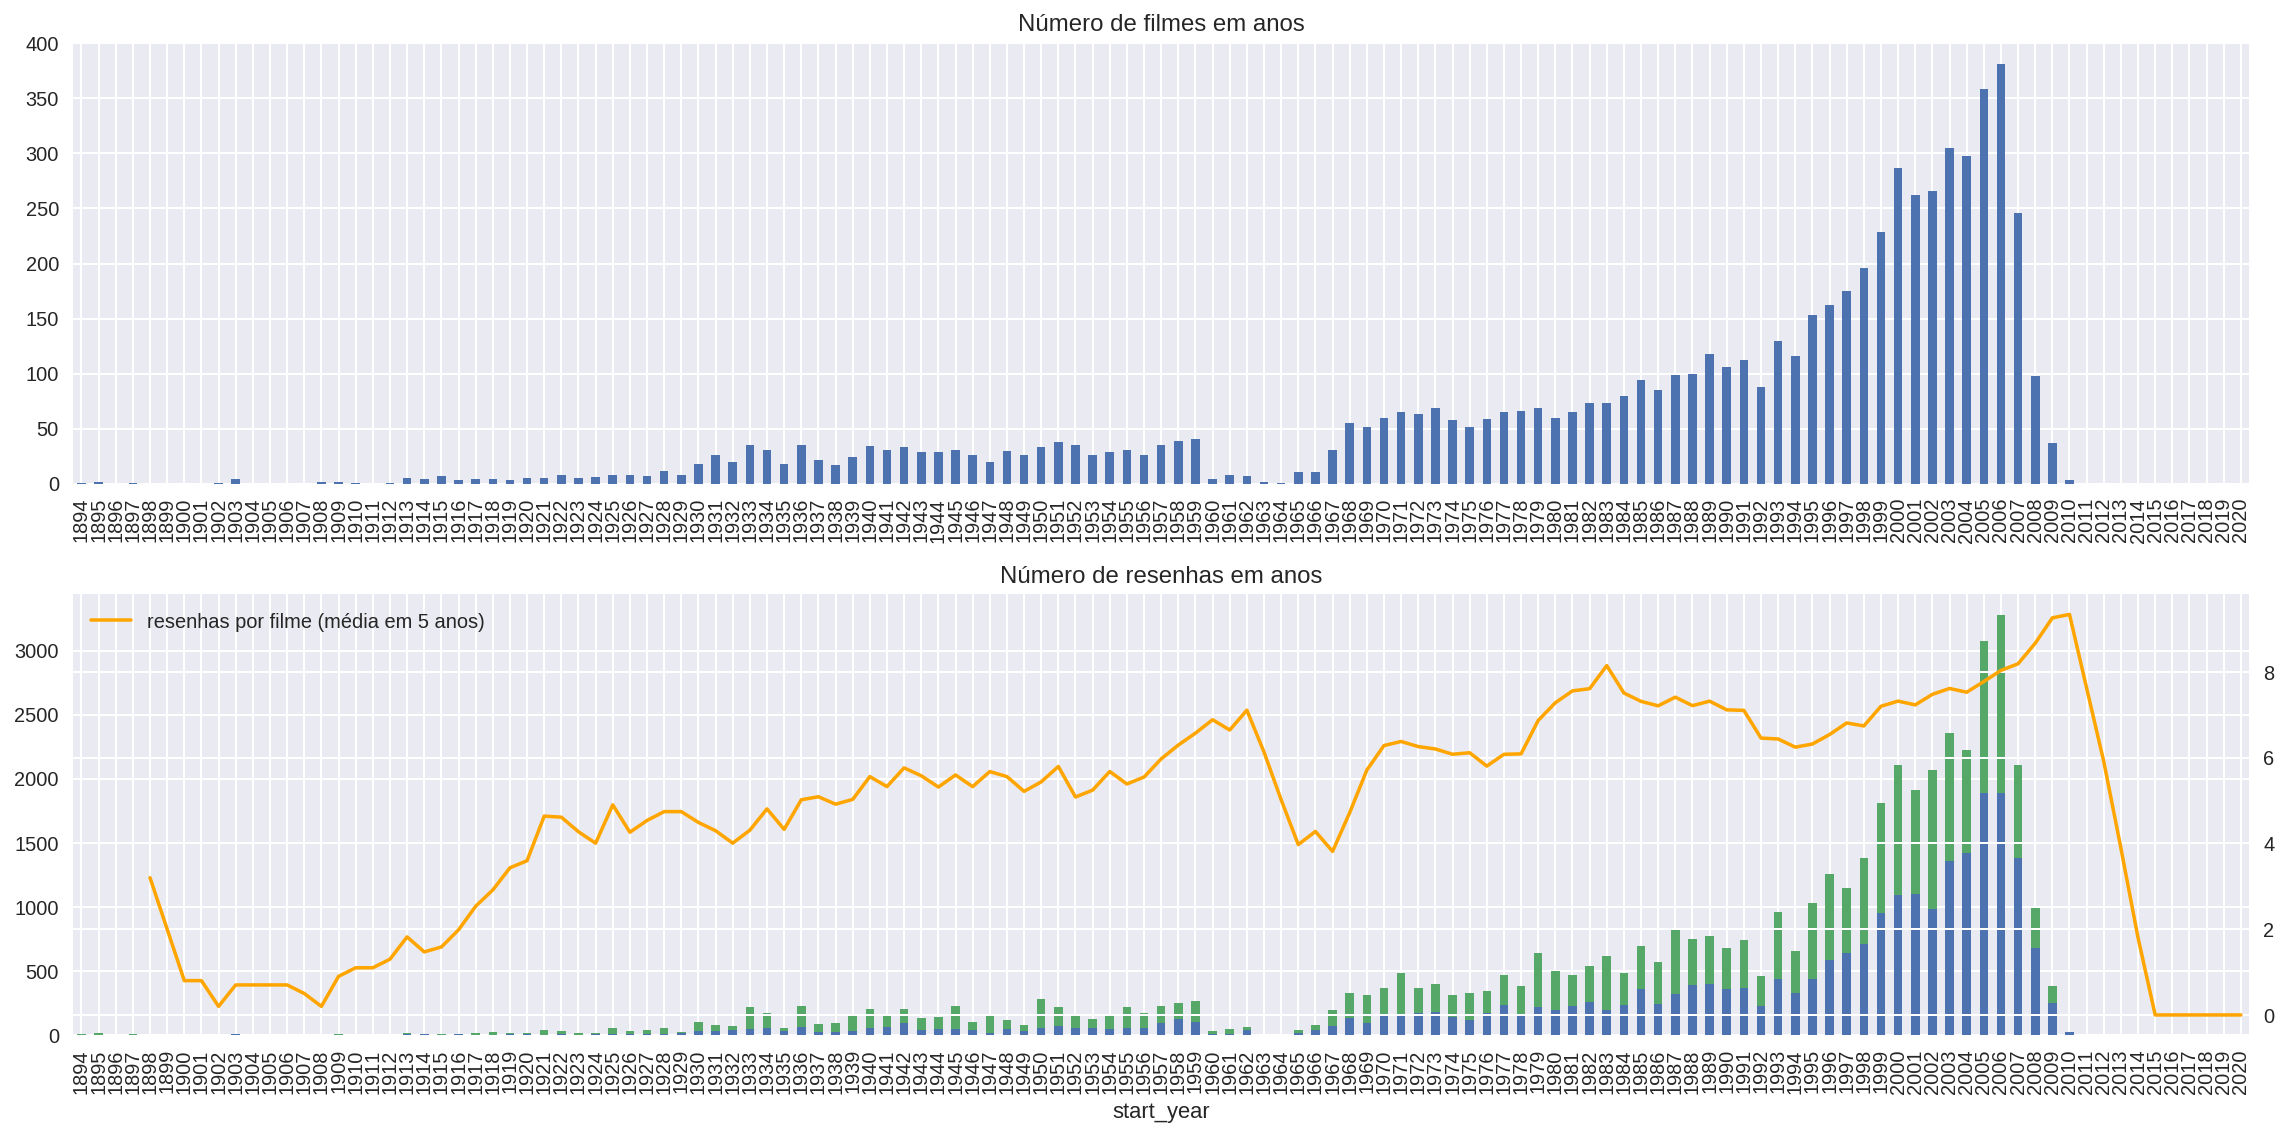

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de filmes em anos')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='resenhas por filme (média em 5 anos)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de resenhas em anos')

fig.tight_layout()

Vamos verificar a distribuição do número de resenhas por filme com a contagem exata e o EDK (Estimativa de densidade kernel - só para saber como pode diferir da contagem exata)

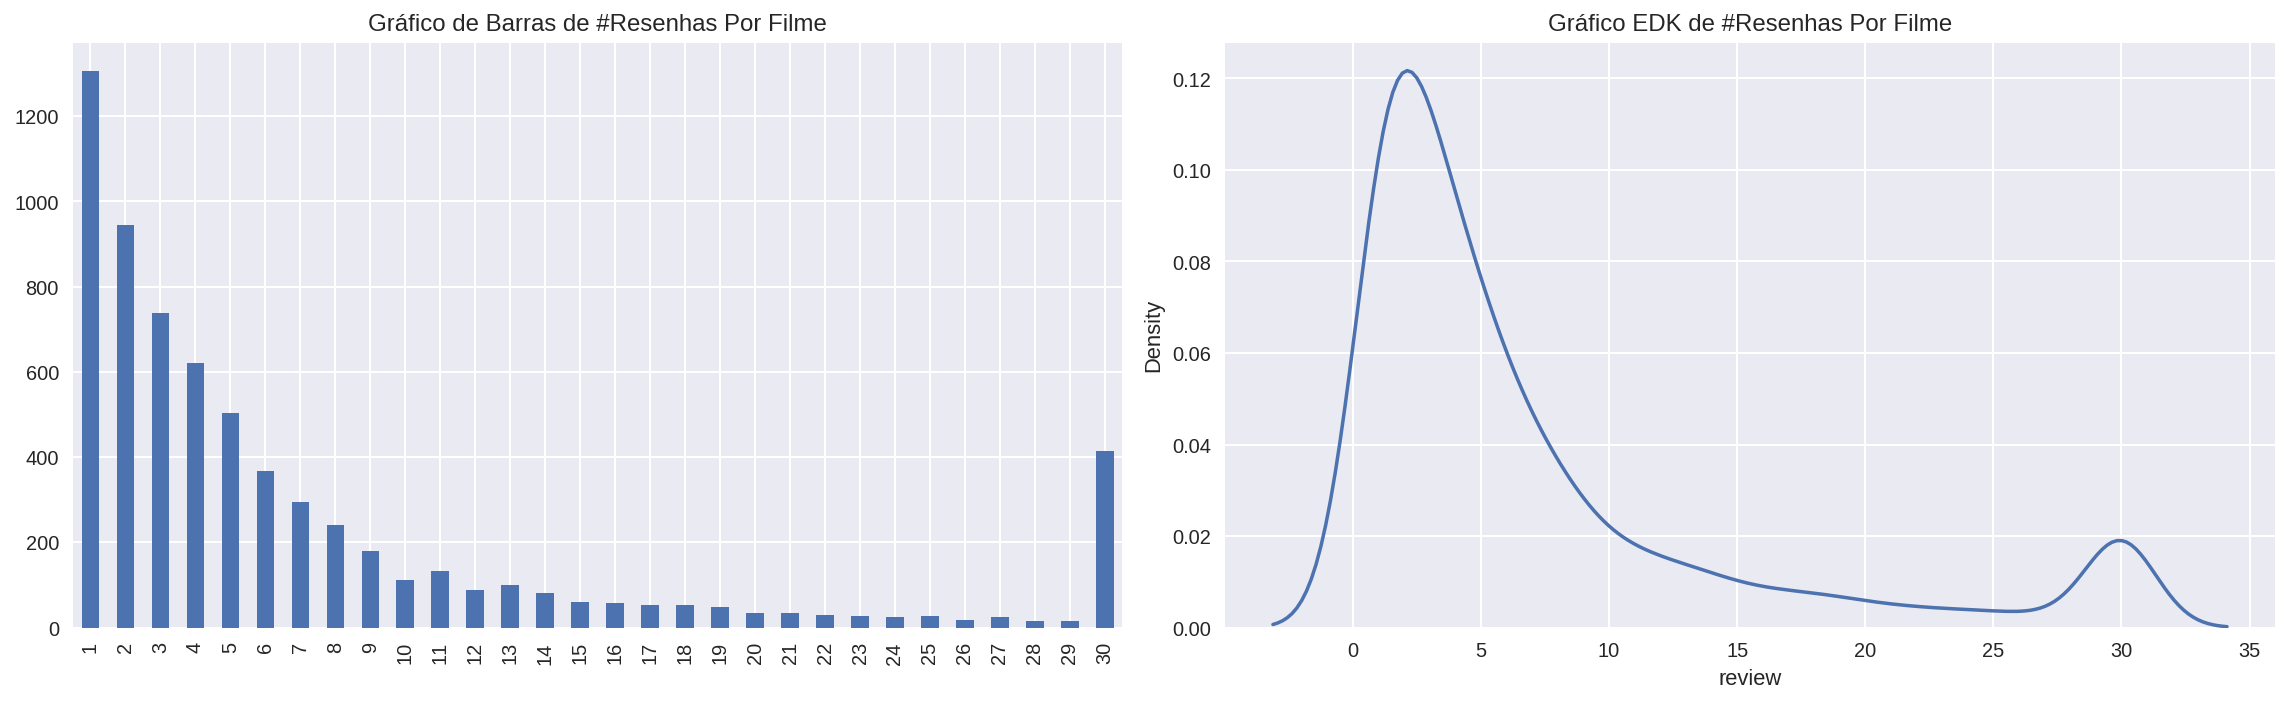

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de Barras de #Resenhas Por Filme')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico EDK de #Resenhas Por Filme')

fig.tight_layout()

In [12]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

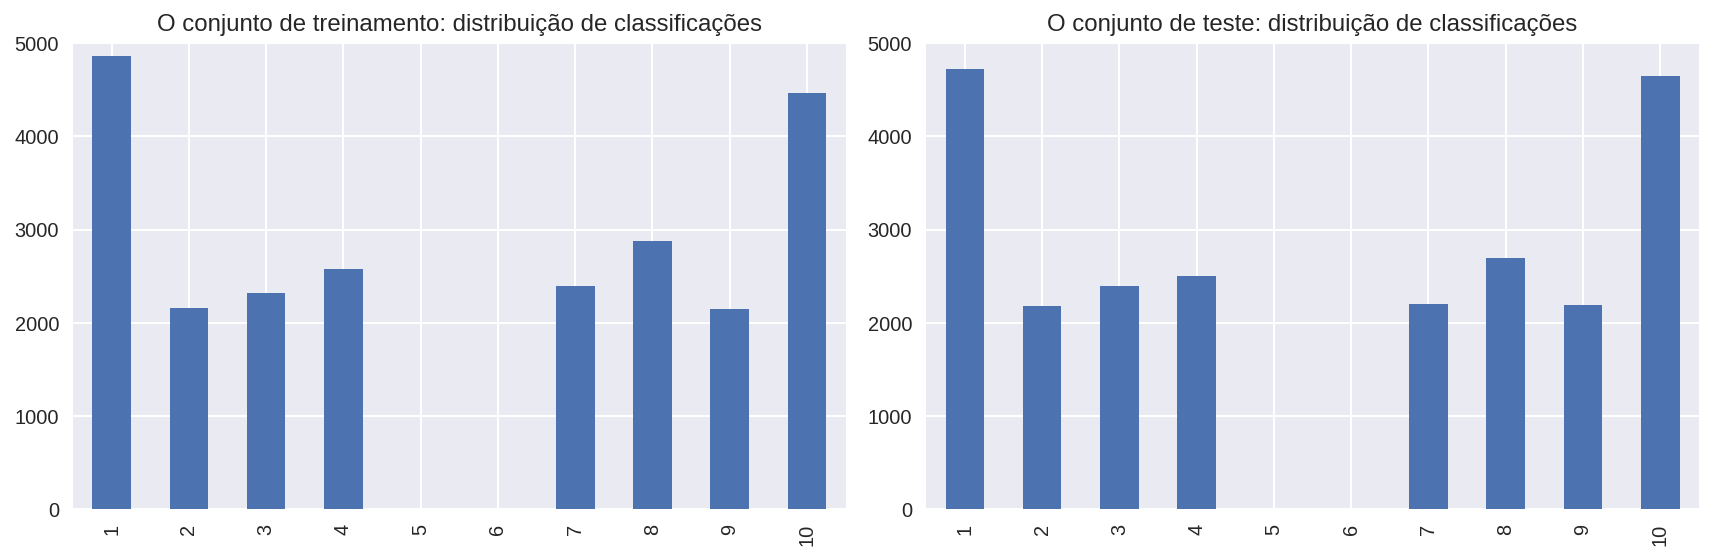

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('O conjunto de treinamento: distribuição de classificações')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('O conjunto de teste: distribuição de classificações')

fig.tight_layout()

Distribuição de resenhas negativas e positivas ao longo dos anos para duas partes do conjunto de dados

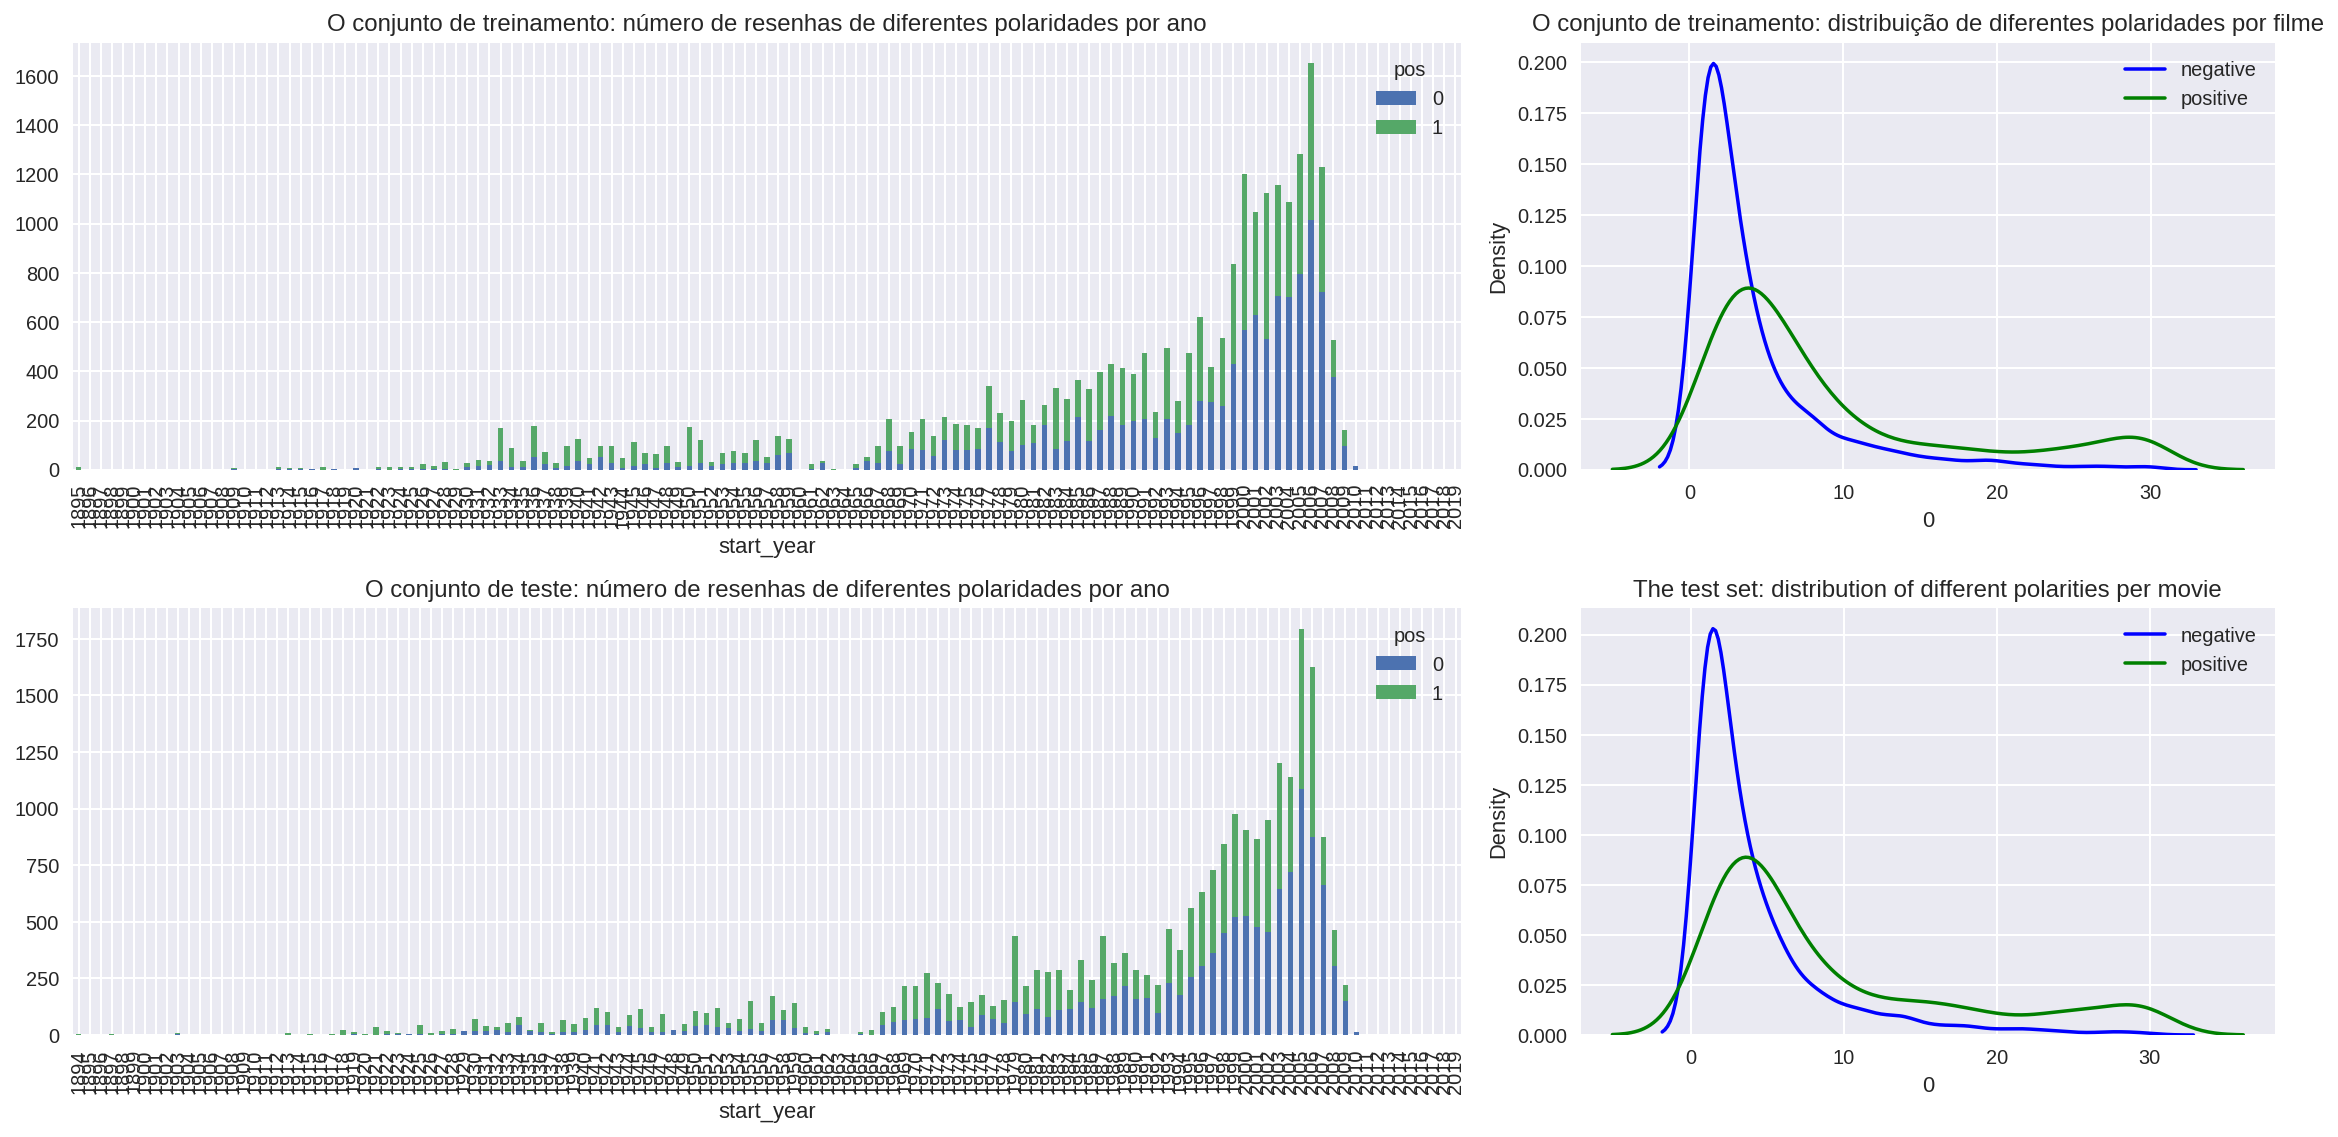

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('O conjunto de treinamento: número de resenhas de diferentes polaridades por ano')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('O conjunto de treinamento: distribuição de diferentes polaridades por filme')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('O conjunto de teste: número de resenhas de diferentes polaridades por ano')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

## Procedimento de Avaliação

Compondo uma rotina de avaliação que pode ser utilizada para todos os modelos deste projeto

In [15]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        eval_stats[type]['F1'] = f1_scores[0]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # Curva de precisão-revocação
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # definindo cruzamentos para alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # Curva de precisão-revocação
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # definindo cruzamentos para alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalização

Assumimos que todos os modelos abaixo aceitam textos em letras minúsculas e sem dígitos, sinais de pontuação, etc.

In [16]:
import re

def preprocess_reviews(df):
    df['review_norm'] = df['review'].str.lower()
    df['review_norm'] = df['review_norm'].apply(lambda x: re.sub(r'[0-9]+', '', x))
    return df


In [17]:
df_reviews = preprocess_reviews(df_reviews)

## Treinar / Testar Conjunto

Felizmente, todo o conjunto de dados já está dividido em partes de treinamento/teste. A opção correspondente é 'ds_part'.

In [18]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Trabalhando com modelos

### Modelo 0 - Constante

In [19]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score

In [20]:
train_features_0 = df_reviews_train.drop(['pos'], axis=1)
train_target_0 = df_reviews_train['pos']
test_features_0 = df_reviews_test.drop(['pos'], axis=1)
test_target_0 = df_reviews_test['pos']

In [21]:
dummy_regr = DummyRegressor(strategy="constant", constant=1)


In [22]:
dummy_regr.fit(train_features_0, train_target_0)

DummyRegressor(constant=array(1), strategy='constant')

In [23]:
pred_dummy_regr_train = dummy_regr.predict(train_target_0)

In [24]:
accuracy_train = accuracy_score(train_target_0, pred_dummy_regr_train)
accuracy_train

0.4994116658261893

In [25]:
pred_dummy_regr_test = dummy_regr.predict(test_target_0)

In [26]:
accuracy_test = accuracy_score(test_target_0, pred_dummy_regr_test)
accuracy_test

0.4984916082430423

Modelo 0 não se saiu tão bem pois é um modelo de DummyRegressor é um modelo muito simples que faz previsões baseadas em estratégias ingênuas, como a média ou a mediana dos valores de treinamento. Essas estratégias podem não ser adequadas para capturar a complexidade dos dados, resultando em baixa acurácia

### Modelo 1 - NLTK, TF-IDF e Regressão Linear

TF-IDF

In [27]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
train_features_1 = df_reviews_train['review_norm']
train_target_1 = df_reviews_train['pos']
test_features_1 = df_reviews_test['review_norm']
test_target_1 = df_reviews_test['pos']

In [29]:
train_features_1.shape

(23796,)

In [30]:
stop_words = set(stopwords.words('english'))
tfidf_vectorizer_1 = TfidfVectorizer(stop_words=stop_words, max_features=60119)

In [31]:
x_train_vec_1 = tfidf_vectorizer_1.fit_transform(train_features_1)
x_train_vec_1.shape

(23796, 60119)

In [32]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train_vec_1,train_target_1)

In [34]:
x_test_vec_1 = tfidf_vectorizer_1.transform(test_features_1)
x_test_vec_1.shape

(23535, 60119)

          train  test
Accuracy   0.94  0.88
F1         0.67  0.67
APS        0.98  0.95
ROC AUC    0.98  0.95


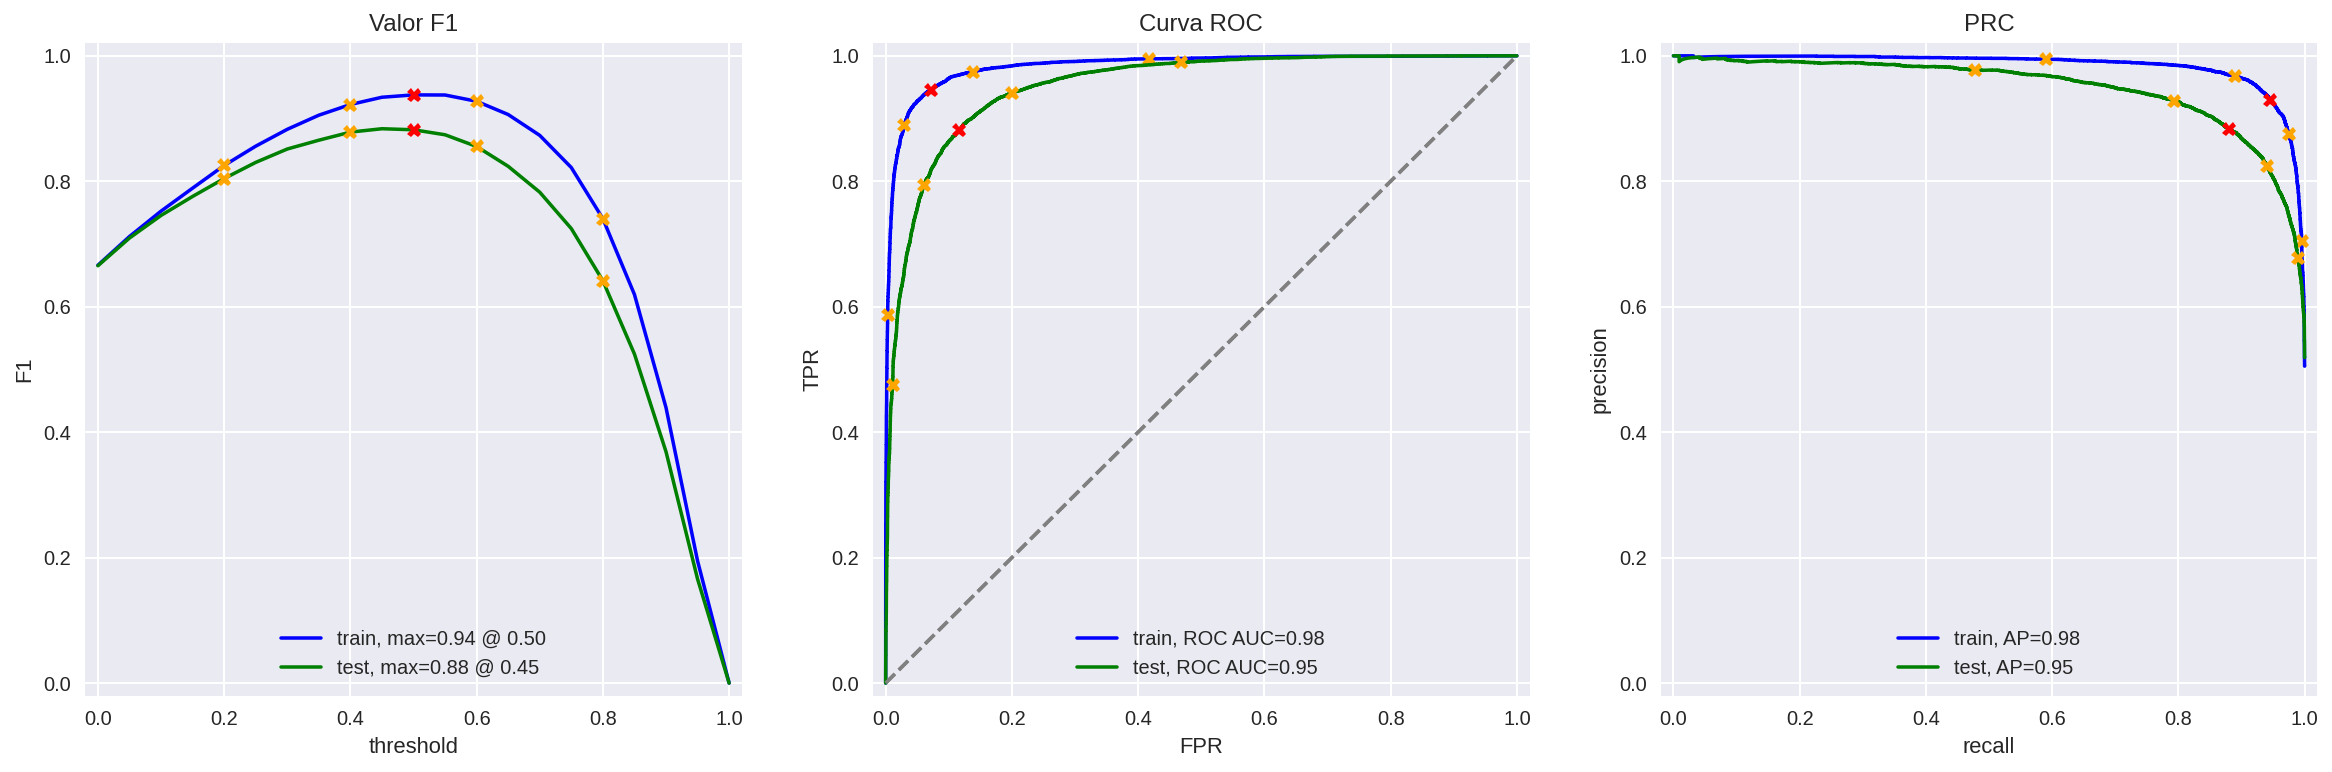

In [35]:
evaluate_model(lr, x_train_vec_1, train_target_1, x_test_vec_1, test_target_1)

O modelo 1 se mostrou suficiente para ultrapassar a meta de Acurácia.

### Modelo 3 - spaCy, TF-IDF e Regressão Linear

In [36]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [37]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [38]:
df_reviews_train['review_tok'] = df_reviews_train['review_norm'].progress_apply(lambda x: text_preprocessing_3(x))

  0%|          | 0/23796 [00:00<?, ?it/s]

In [39]:
df_reviews_test['review_tok'] = df_reviews_test['review_norm'].progress_apply(lambda x: text_preprocessing_3(x))

  0%|          | 0/23535 [00:00<?, ?it/s]

In [40]:
train_features_3 = df_reviews_train['review_tok']
train_target_3 = df_reviews_train['pos']
test_features_3 = df_reviews_test['review_tok']
test_target_3 = df_reviews_test['pos']

In [41]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words=stop_words)

In [42]:
x_train_vec_3 = tfidf_vectorizer_3.fit_transform(train_features_3)
x_train_vec_3.shape

(23796, 60119)

In [43]:
lr.fit(x_train_vec_3,train_target_3)

LogisticRegression()

In [44]:
x_test_vec_3 = tfidf_vectorizer_3.transform(test_features_3)
x_test_vec_3.shape

(23535, 60119)

          train  test
Accuracy   0.93  0.88
F1         0.67  0.67
APS        0.98  0.95
ROC AUC    0.98  0.95


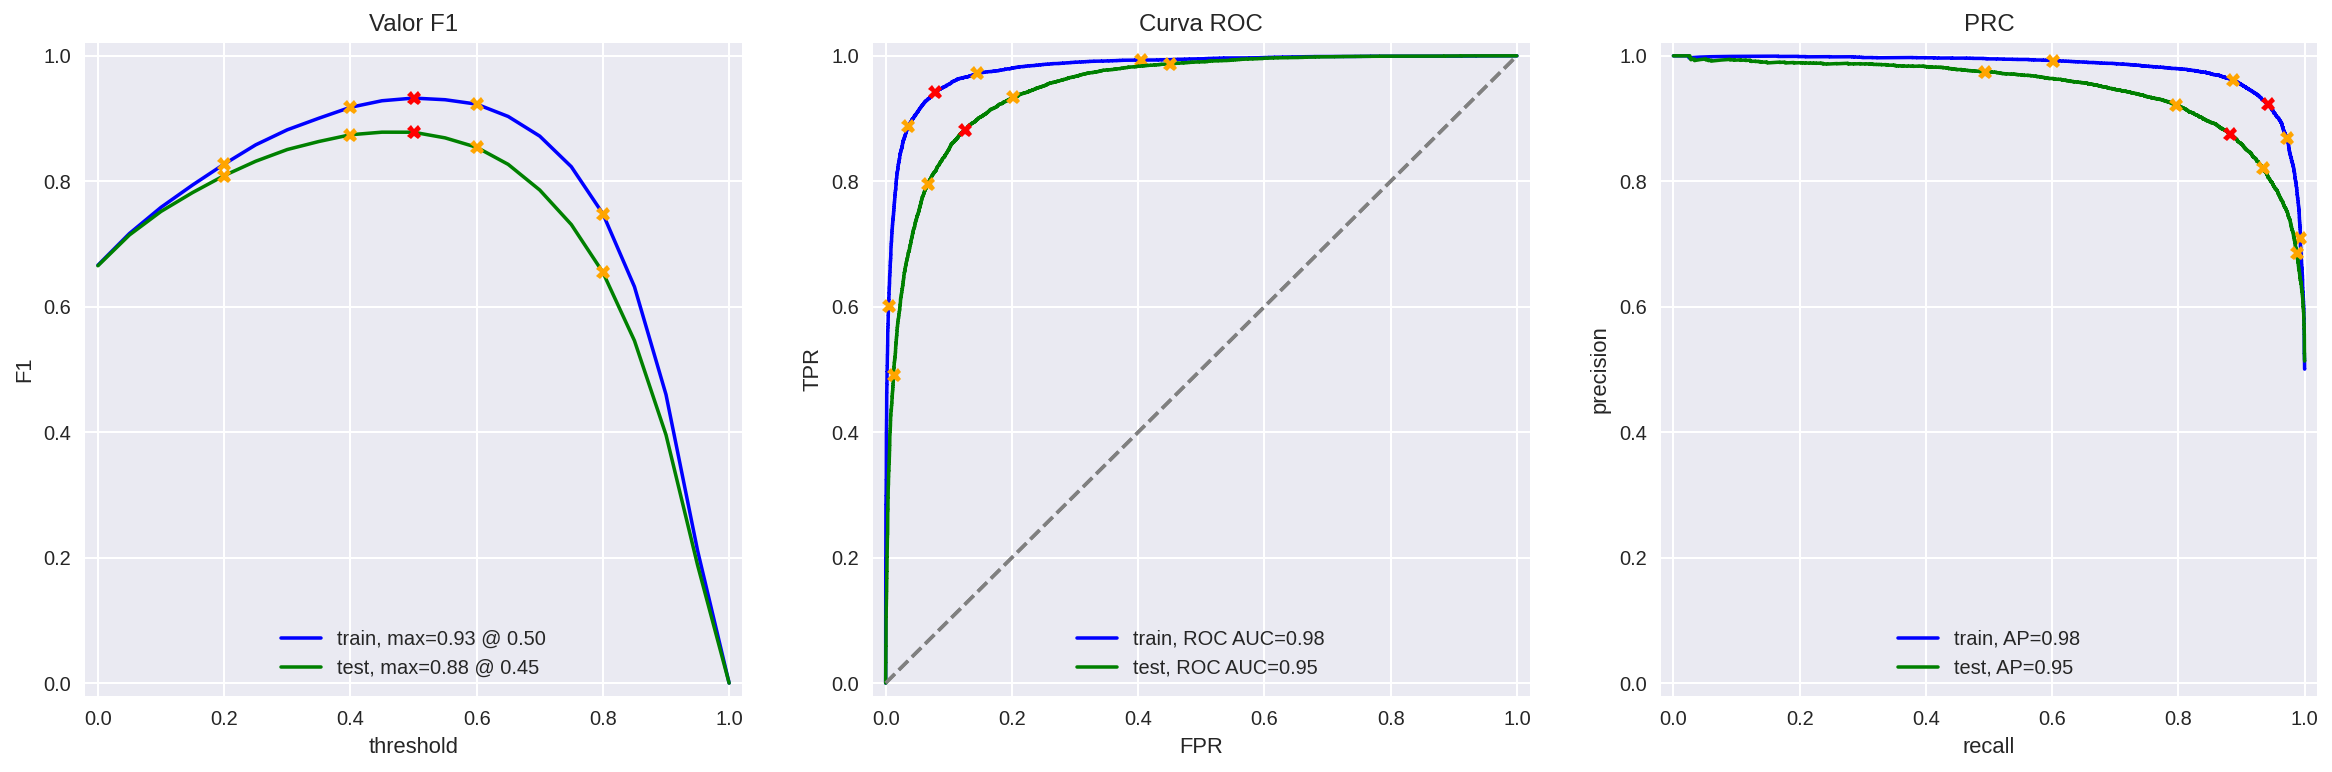

In [45]:
evaluate_model(lr, x_train_vec_3, train_target_3, x_test_vec_3, test_target_3)

O modelo 3 se mostrou suficiente para ultrapassar a meta de Acurácia.

### Modelo 4 - SpaCy, TF-IDF e LGBMClassifier

In [46]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [47]:
train_features_4 = df_reviews_train['review_tok']
train_target_4 = df_reviews_train['pos']
test_features_4 = df_reviews_test['review_tok']
test_target_4 = df_reviews_test['pos']

In [48]:
modellgb = lgb.LGBMClassifier()

In [49]:
tfidf_vectorizer_4 = TfidfVectorizer(stop_words=stop_words)

In [50]:
x_train_vec_4 = tfidf_vectorizer_4.fit_transform(train_features_4)
x_train_vec_4.shape


(23796, 60119)

In [51]:
modellgb.fit(x_train_vec_4,train_target_4)

LGBMClassifier()

In [52]:
x_test_vec_4 = tfidf_vectorizer_4.transform(test_features_4)
x_test_vec_4.shape

(23535, 60119)

          train  test
Accuracy   0.91  0.86
F1         0.67  0.67
APS        0.97  0.93
ROC AUC    0.97  0.94


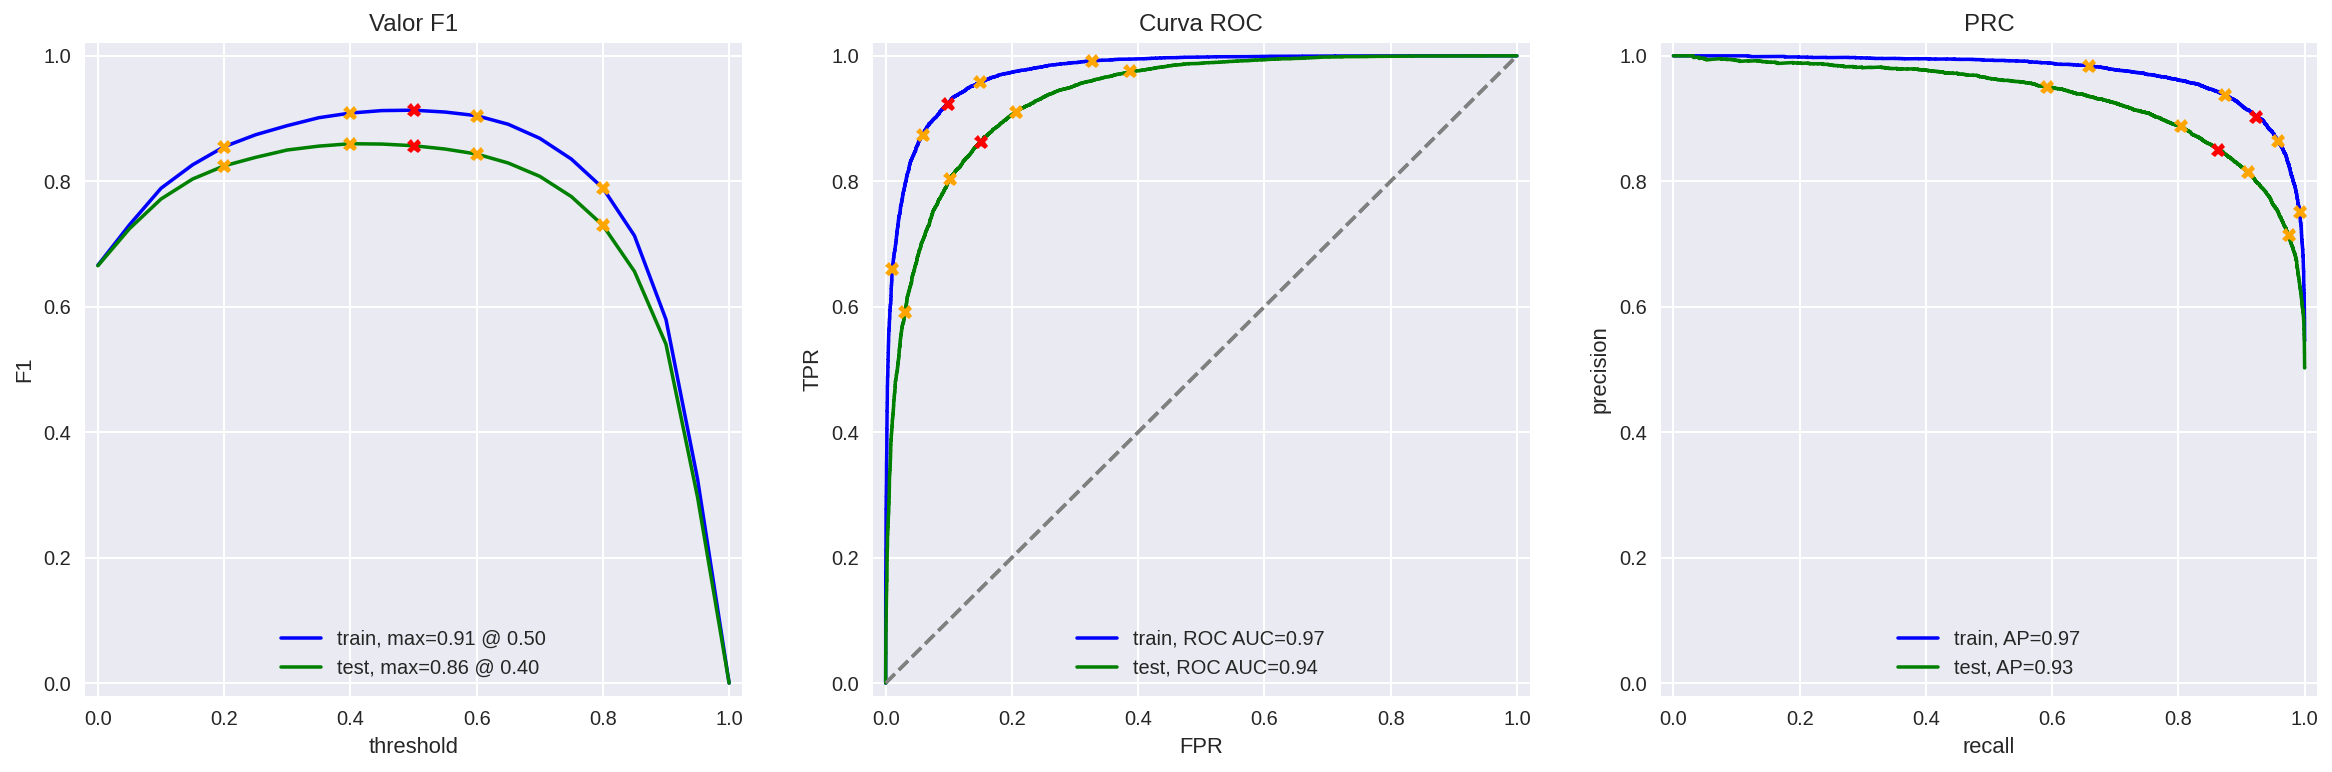

In [53]:
evaluate_model(modellgb, x_train_vec_4, train_target_4, x_test_vec_4, test_target_4)

O modelo 4 se mostrou suficiente para ultrapassar a meta de Acurácia.

###  Modelo 9 - BERT

In [54]:
# import torch
# import transformers

In [55]:
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
# config = transformers.BertConfig.from_pretrained('bert-base-uncased')
# model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [56]:
# def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
#     ids_list = []
#     attention_mask_list = []

#     # texto para IDs de tokens preenchidos com suas máscaras de atenção
    
    
#     # <coloque seu código aqui para criar ids_list e attention_mask_list>
#     for input_text in tqdm(texts, disable=disable_progress_bar):
#         ids_list = tokenizer.encode(
#         input_text.lower(),
#         add_special_tokens=True,
#         truncation=True,
#         max_length=max_length
#     )
#         padded = np.array(ids_list + [0] * (max_length - len(ids_list)))
#         attention_mask = np.where(padded != 0, 1, 0)
#         ids_list.append(padded)
#         attention_mask_list.append(attention_mask) 
    
#     if force_device is not None:
#         device = torch.device(force_device)
#     else:
#         device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
#     model.to(device)
#     if not disable_progress_bar:
#         print(f'Usando o dispositivo {device}.')
    
#     # recebendo incorporações em lotes

#     embeddings = []

#     for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
#         ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
#         attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)].to(deviced)) 
            
#         with torch.no_grad():            
#             model.eval()
#             batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
#         embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
#     return np.concatenate(embeddings)

In [57]:
# Atenção! A execução do BERT para milhares de textos pode levar muito tempo na CPU, pelo menos várias horas
# train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [58]:
# test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

In [59]:
# train_target_9 = df_reviews_train['pos']
# test_target_9 = df_reviews_test['pos']

In [60]:
# print(df_reviews_train['review_norm'].shape)
# print(train_features_9.shape)
# print(train_target.shape)

In [61]:
# print(df_reviews_test['review_norm'].shape)
# print(test_features_9.shape)
# print(test_target.shape)

In [62]:
# tfidf_vectorizer_9 = TfidfVectorizer(stop_words=stop_words)

In [63]:
# x_train_vec_9 = tfidf_vectorizer_9.fit_transform(train_features_4)
# x_train_vec_9.shape

In [64]:
# lr.fit(x_train_vec_9,train_target_9)

In [65]:
# x_test_vec_9 = tfidf_vectorizer_9.transform(test_features_9)
# x_test_vec_9.shape

In [66]:
# evaluate_model(lr, x_train_vec_9, train_target_9, x_test_vec_9, test_target_9)

In [67]:
# se você tiver as incorporações, é aconselhável salvá-las para tê-las prontas se 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# e carregar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## Minhas Resenhas

In [68]:
# sinta-se à vontade para remover completamente essas resenhas e experimentar seus modelos nas suas próprias resenhas, as abaixo são apenas exemplos

my_reviews = pd.DataFrame([
    'Eu simplesmente não gostei, não é meu tipo de filme.',
    'Bem, eu fiquei entediado e dormi no meio do filme.',
    'Eu fiquei realmente fascinado com o filme',    
    'Os atores pareciam muito velhos e desinteressados, e mesmo assim foram pagos para participar do filme. Que roubo de dinheiro sem vergonha.',
    'Eu não esperava que a nova versão fosse tão boa! Os escritores realmente se importaram com o material original',
    'O filme tem seus prós e contrbas, mas eu sinto que em geral é um filme decente. Eu posso me imaginar indo assistir novamente.',
    'Que tentativa podre de comédia. Nem uma única piada cai, todo mundo age de forma irritante e barulhenta, nem crianças não vão gostar disso!',
    'Lançar na Netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir episódio após episódio, deste emocionante e inteligente novo drama.'
], columns=['review'])

my_reviews = preprocess_reviews(my_reviews)
my_reviews = my_reviews.drop(['review'], axis=1)
my_reviews

,review_norm
0,"eu simplesmente não gostei, não é meu tipo de ..."
1,"bem, eu fiquei entediado e dormi no meio do fi..."
2,eu fiquei realmente fascinado com o filme
3,os atores pareciam muito velhos e desinteressa...
4,eu não esperava que a nova versão fosse tão bo...
5,"o filme tem seus prós e contrbas, mas eu sinto..."
6,que tentativa podre de comédia. nem uma única ...
7,lançar na netflix foi uma jogada corajosa e eu...


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O modelo foi treinado em inglês, logo você precisa usr o google translator para dar como entrada resenhas em inglês
</div>


In [69]:
stop_words = set(stopwords.words('portuguese'))
tfidf_vectorizer_2 = TfidfVectorizer(stop_words=stop_words, max_features=60119)
tfidf_vectorizer_2.fit_transform(train_features_1)

<23796x60119 sparse matrix of type '<class 'numpy.float64'>'
	with 3187123 stored elements in Compressed Sparse Row format>

In [77]:
stop_words = set(stopwords.words('portuguese'))
tfidf_vectorizer_3 = TfidfVectorizer(stop_words=stop_words, max_features=60119)
tfidf_vectorizer_3.fit_transform(train_features_3)

<23796x60119 sparse matrix of type '<class 'numpy.float64'>'
	with 2989036 stored elements in Compressed Sparse Row format>

In [78]:
stop_words = set(stopwords.words('portuguese'))
tfidf_vectorizer_4 = TfidfVectorizer(stop_words=stop_words, max_features=60119)
tfidf_vectorizer_4.fit_transform(train_features_4)

<23796x60119 sparse matrix of type '<class 'numpy.float64'>'
	with 2989036 stored elements in Compressed Sparse Row format>

In [73]:
# stop_words = set(stopwords.words('portuguese'))
# tfidf_vectorizer_9 = TfidfVectorizer(stop_words=stop_words)
# tfidf_vectorizer_9.fit_transform(train_features_9)

### Modelo 2

In [74]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = lr.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.48:  eu simplesmente não gostei, não é meu tipo de filme.
0.61:  bem, eu fiquei entediado e dormi no meio do filme.
0.48:  eu fiquei realmente fascinado com o filme
0.49:  os atores pareciam muito velhos e desinteressados, e mesmo assim foram pagos para participar do film
0.45:  eu não esperava que a nova versão fosse tão boa! os escritores realmente se importaram com o materia
0.48:  o filme tem seus prós e contrbas, mas eu sinto que em geral é um filme decente. eu posso me imaginar
0.47:  que tentativa podre de comédia. nem uma única piada cai, todo mundo age de forma irritante e barulhe
0.48:  lançar na netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir episódio após


### Modelo 3

In [79]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = lr.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.48:  eu simplesmente não gostei, não é meu tipo de filme.
0.48:  bem, eu fiquei entediado e dormi no meio do filme.
0.48:  eu fiquei realmente fascinado com o filme
0.49:  os atores pareciam muito velhos e desinteressados, e mesmo assim foram pagos para participar do film
0.50:  eu não esperava que a nova versão fosse tão boa! os escritores realmente se importaram com o materia
0.48:  o filme tem seus prós e contrbas, mas eu sinto que em geral é um filme decente. eu posso me imaginar
0.46:  que tentativa podre de comédia. nem uma única piada cai, todo mundo age de forma irritante e barulhe
0.48:  lançar na netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir episódio após


### Modelo 4

In [80]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = lr.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.48:  eu simplesmente não gostei, não é meu tipo de filme.
0.48:  bem, eu fiquei entediado e dormi no meio do filme.
0.48:  eu fiquei realmente fascinado com o filme
0.49:  os atores pareciam muito velhos e desinteressados, e mesmo assim foram pagos para participar do film
0.50:  eu não esperava que a nova versão fosse tão boa! os escritores realmente se importaram com o materia
0.48:  o filme tem seus prós e contrbas, mas eu sinto que em geral é um filme decente. eu posso me imaginar
0.46:  que tentativa podre de comédia. nem uma única piada cai, todo mundo age de forma irritante e barulhe
0.48:  lançar na netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir episódio após


### Modelo 9

In [ ]:
# texts = my_reviews['review_norm']

# my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# my_reviews_pred_prob = model.predict_proba(my_reviews_features_9)[:, 1]

# for i, review in enumerate(texts.str.slice(0, 100)):
#     print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

Dados os modelos para classificar resenhas como positivas e negativas com boas Acurácias. Com modelo em maior destaque Modelo 1 - NLTK, TF-IDF e Regressão Linear que teve maior sucesso.

## Conclusões

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos e sklearn para criação do nosso modelo.

Realizamos o pre-processamento, para que não tivesse acontecido algum problema na criação do nosso modelo. Realizamos a AED para verificar o se havia o desbalanceamento de classe, O modelo com melhor desempenho foi o Modelo 1 - NLTK, TF-IDF e Regressão Linear, enquanto o com pior desempenho foi o Modelo 0 - Constante, Testamos o modelo de spaCy, TF-IDF e Regressão Linear e SpaCy, TF-IDF e LGBMClassifier.

# Checklist

- [x]  O caderno foi aberto
- [ ]  Os dados de texto são carregados e pré-processados para vetorização
- [ ]  Os dados de texto são transformados em vetores
- [ ]  Os modelos são treinados e testados
- [ ]  O limiar da métrica foi atingido
- [ ]  Todas as células de código estão organizadas na ordem de sua execução
- [ ]  Todas as células de código podem ser executadas sem erros
- [ ]  Há conclusões 


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Projeto maduro
- Código limpo, eficiente
- Uso de funções para fins de reúso e modularização

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Usar texto em inglês conforme o treinamento do modelo </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas comigo usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>